In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')
products = pd.read_csv('Products.csv')

In [3]:
# Calculating total spend and aggregating features for customers
transactions['TotalSpend'] = transactions['Price'] * transactions['Quantity']
customer_features = transactions.groupby('CustomerID').agg({
    'TotalSpend': 'sum',
    'Quantity': 'sum'
}).reset_index()
print("Aggregated customer features:")
print(customer_features.head(), "\n")

Aggregated customer features:
  CustomerID  TotalSpend  Quantity
0      C0001     3354.52        12
1      C0002     1862.74        10
2      C0003     2725.38        14
3      C0004     5354.88        23
4      C0005     2034.24         7 



In [4]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(customer_features.iloc[:, 1:])

In [5]:
import os
os.environ["OMP_NUM_THREADS"] = "1"  # Limit the number of threads to 1

db_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(features_scaled)
    score = davies_bouldin_score(features_scaled, kmeans.labels_)
    db_scores.append(score)
    print(f"Number of Clusters: {k}, Davies-Bouldin Score: {score:.3f}")

Number of Clusters: 2, Davies-Bouldin Score: 0.627
Number of Clusters: 3, Davies-Bouldin Score: 0.709
Number of Clusters: 4, Davies-Bouldin Score: 0.721
Number of Clusters: 5, Davies-Bouldin Score: 0.777
Number of Clusters: 6, Davies-Bouldin Score: 0.823
Number of Clusters: 7, Davies-Bouldin Score: 0.878
Number of Clusters: 8, Davies-Bouldin Score: 0.943
Number of Clusters: 9, Davies-Bouldin Score: 0.881
Number of Clusters: 10, Davies-Bouldin Score: 0.814


In [6]:
optimal_k = k_range[db_scores.index(min(db_scores))]
print(f"\nOptimal number of clusters determined: {optimal_k} (lowest Davies-Bouldin Score: {min(db_scores):.3f})\n")


Optimal number of clusters determined: 2 (lowest Davies-Bouldin Score: 0.627)



In [7]:
# Final clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42).fit(features_scaled)
customer_features['Cluster'] = kmeans.labels_
print("Cluster assignments for customers:")
print(customer_features.head(), "\n")

Cluster assignments for customers:
  CustomerID  TotalSpend  Quantity  Cluster
0      C0001     3354.52        12        1
1      C0002     1862.74        10        1
2      C0003     2725.38        14        1
3      C0004     5354.88        23        0
4      C0005     2034.24         7        1 



Davies-Bouldin Index for final clustering: 0.627



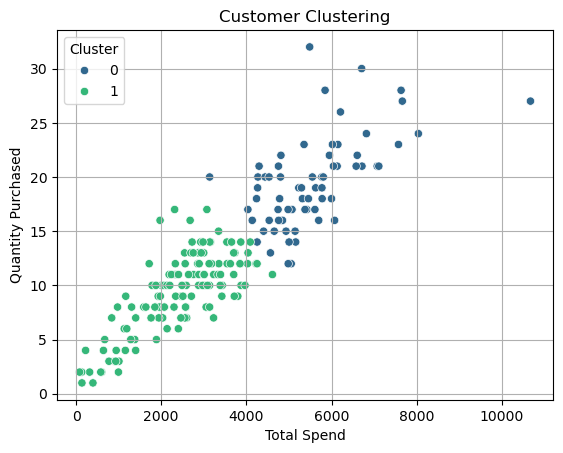

In [8]:
# Davies-Bouldin Index and Visualization
print(f"Davies-Bouldin Index for final clustering: {min(db_scores):.3f}\n")
sns.scatterplot(
    x=customer_features['TotalSpend'],
    y=customer_features['Quantity'],
    hue=customer_features['Cluster'],
    palette='viridis'
)

plt.title("Customer Clustering")
plt.xlabel("Total Spend")
plt.ylabel("Quantity Purchased")
plt.grid(True)
plt.show()